In [1]:
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import cv2

import data
import encoder
import decoder
import VAE

c:\Users\kobil\Documents\CSC2516\Final_proj\DL-AutoEncoder\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Files already downloaded and verified


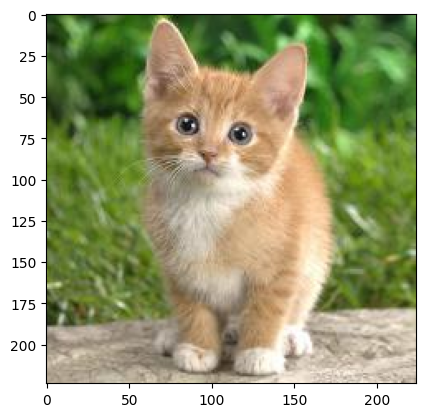

In [2]:
train_ds,_,_ = data.get_datasets()
#input_img = train_ds.data[7]
input_img = cv2.imread('cat_224x224.jpg',)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
plt.imshow(input_img)
input_tensor = data.transform(input_img)
input_tensor = input_tensor.expand((1,3,224,224))
#input_tensor = input_tensor.expand((1,3,32,32))

In [3]:
#model = resnet18(weights=ResNet18_Weights.DEFAULT)
#model = encoder.resnet18(pretrained=True)
#model.eval()

In [4]:

encoder_ = encoder.resnet18(pretrained=False)
encoder_.avgpool = nn.AdaptiveAvgPool2d((1, 1))
encoder_.fc = nn.Identity()
decoder_ = decoder.ResNet18Dec(z_dim=128)
model = VAE.VAE(encoder_,decoder_,512,128)

model.load_state_dict(torch.load('VAE_bn_128_beta_0.pt'))
model = model.encoder
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
train_nodes, eval_nodes = get_graph_node_names(model)
eval_nodes

['x',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.add',
 'layer1.0.relu_1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.add',
 'layer1.1.relu_1',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.relu_1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.add',
 'layer2.1.relu_1',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.relu',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.0.add',
 'layer3.0.relu_1',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.relu',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer3.1.add',
 'layer3.1.relu_1',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.relu',
 'layer4.0.conv2',
 'layer4.0.bn2',

In [6]:
return_nodes = ['layer1', 'layer2', 'layer3', 'layer4']
feat_ext = create_feature_extractor(model, return_nodes=return_nodes)

In [7]:
with torch.no_grad():
    out = feat_ext(input_tensor)

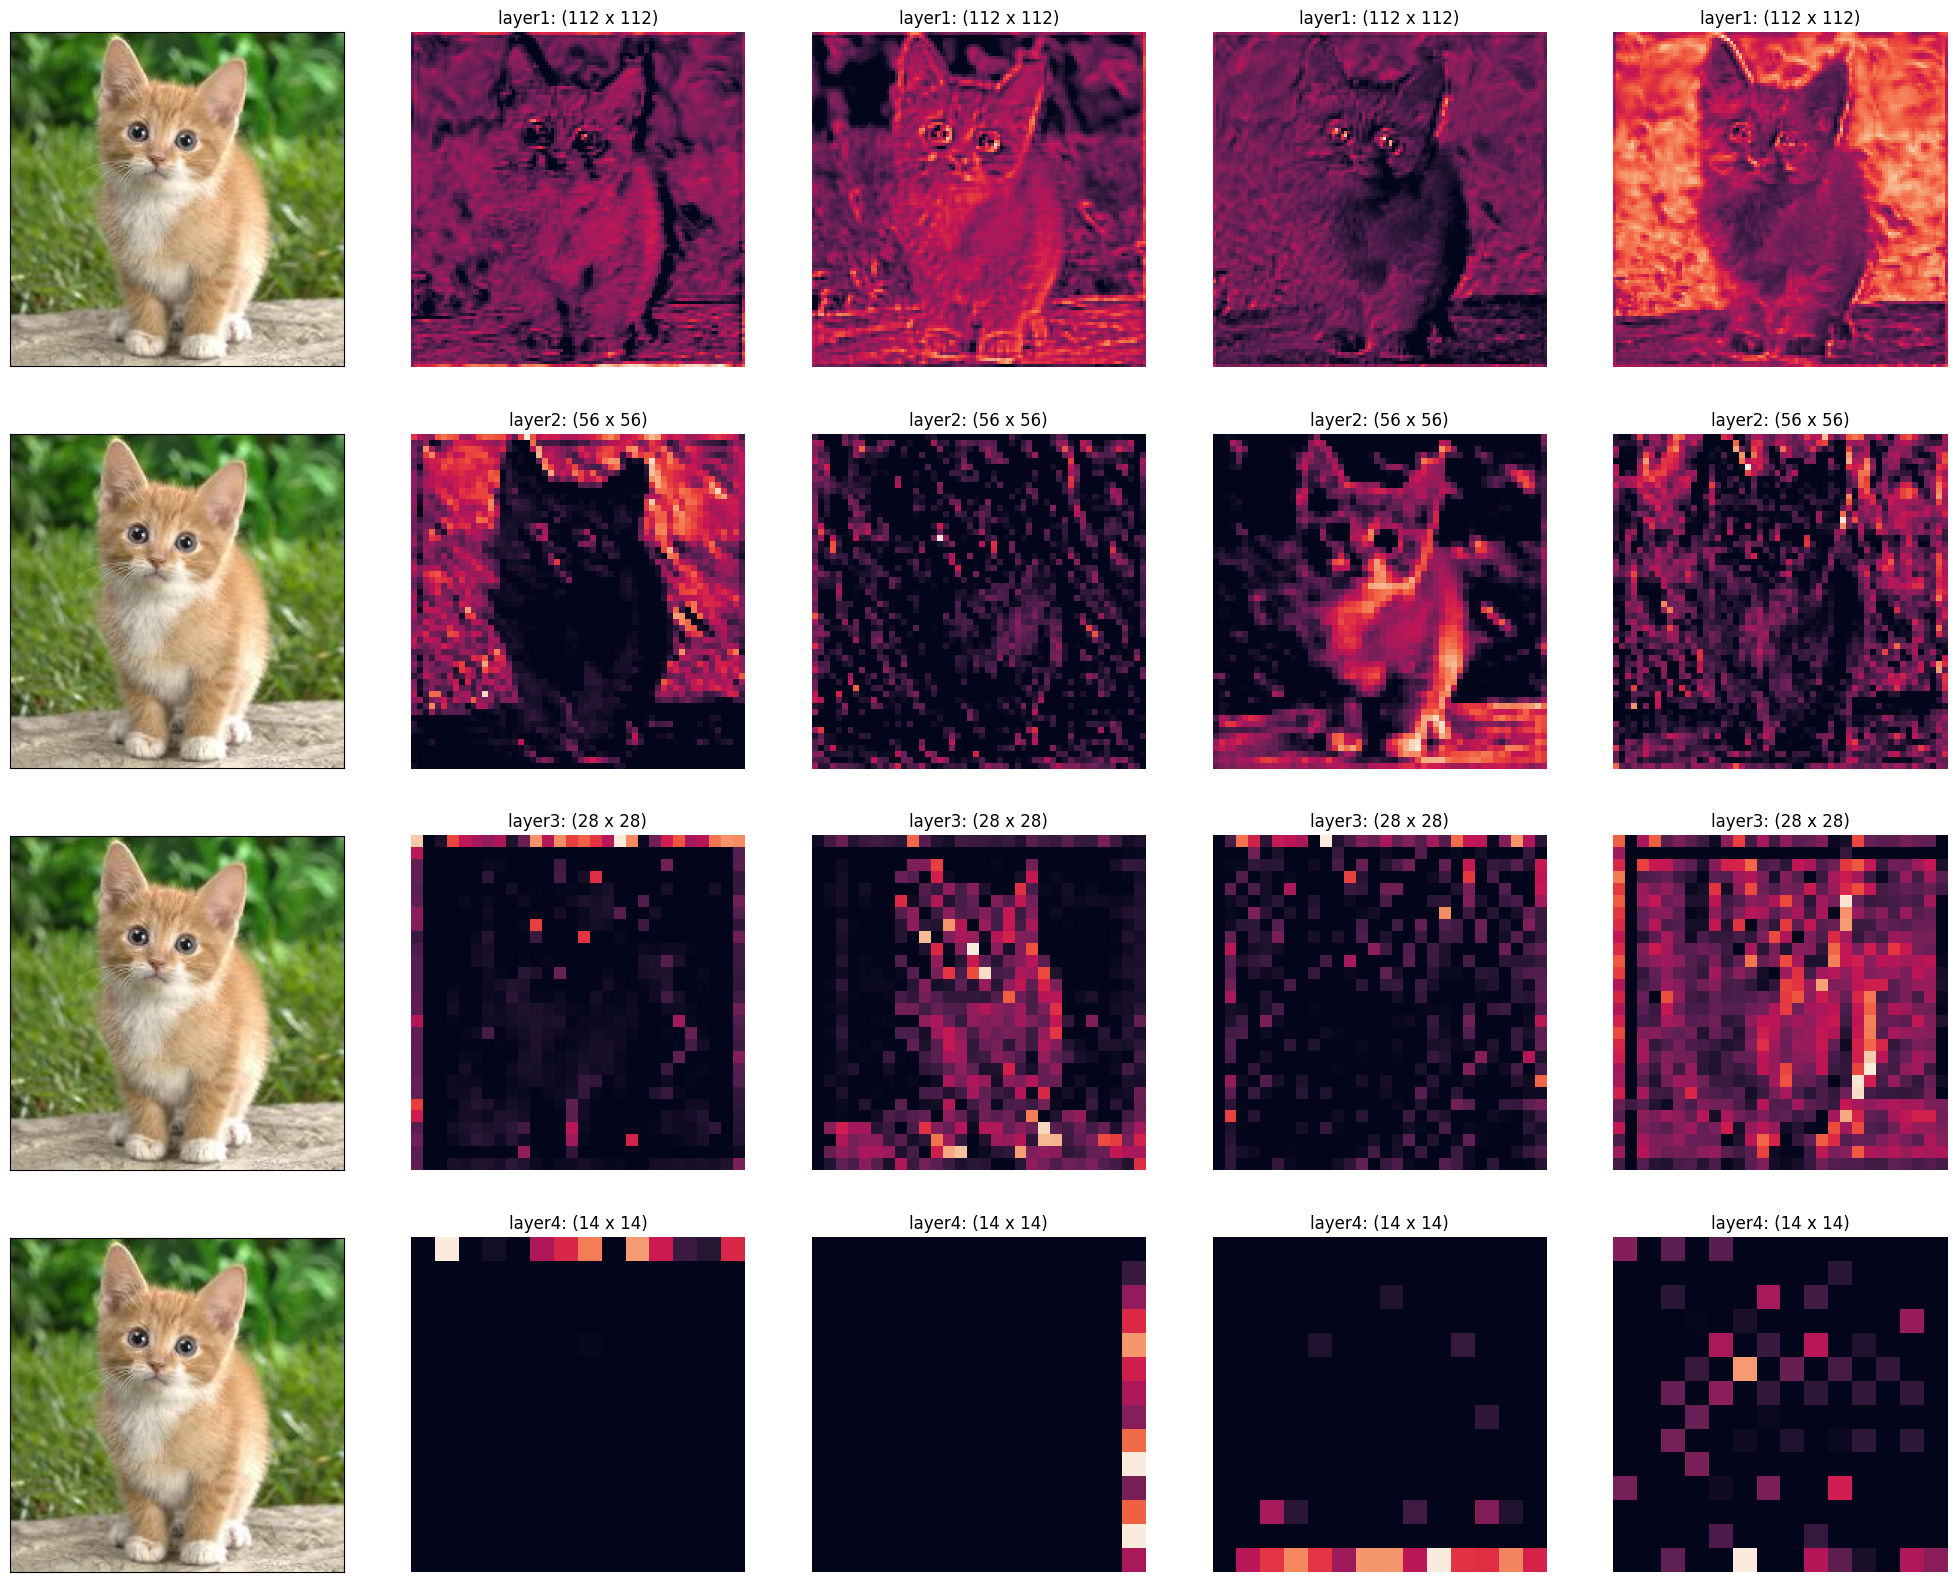

In [8]:
fig, ax = plt.subplots(4,5, figsize = (25,20))

for i, layer in enumerate(return_nodes):
    feat_maps = out[layer].numpy().squeeze(0)
    feat_maps = random.sample(list(feat_maps), 4)
    ax[i][0].imshow(input_img)
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    for j, feat_map in enumerate(feat_maps):
        sns.heatmap(feat_map, ax=ax[i][j+1], cbar = False)
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        ax[i][j+1].set_title(f'{layer}: ({feat_map.shape[0]} x {feat_map.shape[1]})')